<a href="https://colab.research.google.com/github/sarawgiche/Neural-Networks-using-Tensorflow-from-basics-to-advanced/blob/master/part_identification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15150, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 15150 (delta 39), reused 51 (delta 21), pack-reused 15073
Receiving objects: 100% (15150/15150), 13.50 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (10285/10285), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [6]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 10000_Video_001.mkv
'10 and 12 marksheet.pdf'
'118EE0334_Chetan_1 (1).pdf'
 118EE0334_CHETAN_1-1.pdf
'118EE0334_Chetan_1 (2).pdf'
'118EE0334_Chetan_1 (3).pdf'
 118EE0334_Chetan_1.pdf
 118EE0334_CHETAN_1.pdf
 118EE0334_Chetan_2.pdf
 118EE0334_Chetan_photo.pdf
 118EE0334.pdf
 1565323885455sgK843NY1r5Qp09t.pdf
'1st sem result.pdf'
 20191007_180203_0000.png
 20191007_182800_0000.png
 20191007_182800_0001.png
 20191007_182856_0000.png
 20191007_182856_0001.png
 20191008_095518_0000.png
 20191008_095518_0001.png
 20191008_100157_0000.png
 20191008_100157_0001.png
 20191008_100835_0000.png
 20191008_100835_0001.png
 3_SoCVerification_Modules_6months.pdf
 519031618525060501.pdf
'Access to Energy.gslides'
'actual expenses.pdf'
 AdmitCard_80016251.pdf
'Admit Card.pdf'
' Adverbs - Answer sheet.gdoc'
'Adverbs - Answer sheet.gdoc'
 Ankit_Biodata-converted.gdoc
 ankitche.pdf
'assignment 1.jpg'
'Bajaj Auto TWFI PPT Template.gslides'
 Bajaj_Internship
'BAJAJ Report.gdoc'
'bank passbook (1).pdf'
'bank

In [7]:
!ls /content/gdrive/MyDrive/Bajaj_Internship

backup	      generate_train.py  images.jpg  obj.names	yolov3_custom2.cfg
download.jpg  image.jpg		 obj.data    obj.zip


In [8]:
# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/Bajaj_Internship/obj.zip ../

In [9]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/darknet/data/obj

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/classes.txt  
  inflating: /content/darknet/data/obj/download (1).jpg  
  inflating: /content/darknet/data/obj/download (1).txt  
  inflating: /content/darknet/data/obj/download (2).jpg  
  inflating: /content/darknet/data/obj/download (2).txt  
  inflating: /content/darknet/data/obj/download (3).jpg  
  inflating: /content/darknet/data/obj/download (3).txt  
  inflating: /content/darknet/data/obj/download (4).jpg  
  inflating: /content/darknet/data/obj/download (4).txt  
  inflating: /content/darknet/data/obj/download (5).jpg  
  inflating: /content/darknet/data/obj/download (5).txt  
  inflating: /content/darknet/data/obj/download (6).jpg  
  inflating: /content/darknet/data/obj/download (6).txt  
  inflating: /content/darknet/data/obj/download (7).jpg  
  inflating: /content/darknet/data/obj/download (7).txt  
  inflating: /content/darknet/data/obj/download (8).jpg  
  inflating: /content/darknet/data/obj/download (8).txt 

In [ ]:
# download cfg to google drive and change its name
#!cp /content/darknet/cfg/yolov3.cfg /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg

In [17]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg .cfg 

In [18]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/Bajaj_Internship/obj.names /content/darknet/data
!cp /content/gdrive/MyDrive/Bajaj_Internship/obj.data  /content/darknet/data


In [19]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/Bajaj_Internship/generate_train.py ./

In [20]:
%cd /content

/content


In [21]:
!python /content/gdrive/MyDrive/Bajaj_Internship/generate_train.py

In [22]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-06-28 18:22:04--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-06-28 18:22:04--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  45.0MB/s    in 3.8s    

2021-06-28 18:22:08 (40.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!/content/darknet/darknet detector train /content/darknet/data/obj.data /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg /content/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 73174, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.656843), count: 4, class_loss = 0.334074, iou_loss = 0.238730, total_loss = 0.572805 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 73178, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.720956), count: 4, class_loss = 0.165566, iou_loss = 0.134805, total_loss = 0.300370 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse 

In [13]:
 # need to set our custom cfg to test mode 
!sed -i 's/batch=32/batch=1/' /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg
%cd ..

/content


In [14]:
pip install opencv-python

In [25]:
import cv2
%cd /content/darknet

/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

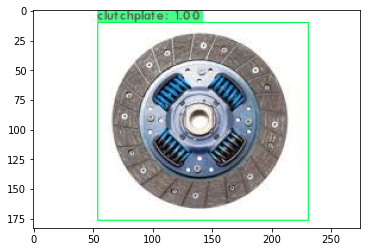

In [26]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!/content/darknet/darknet detector test /content/darknet/data/obj.data /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg /content/gdrive/MyDrive/Bajaj_Internship/backup/yolov3_custom2_last.weights /content/gdrive/MyDrive/Bajaj_Internship/image.jpg -thresh 0.15 -dont_show
from matplotlib import pyplot as plt
a=cv2.imread("predictions.jpg")
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(a)
plt.show()

In [28]:
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [29]:
%cd ..
upload()

/


Saving download.jpg to download.jpg
saved file download.jpg


In [33]:
%cd darknet
!./darknet detect /content/gdrive/MyDrive/Bajaj_Internship/yolov3_custom2.cfg ../download.jpeg
a=cv2.imread("predictions.jpg")
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(a)
plt.show()

[Errno 2] No such file or directory: 'darknet'
/
/bin/bash: ./darknet: No such file or directory


error: ignored